In [4]:
import networkx as nx
import numpy as np
import pandas as pd

from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
from sknetwork.ranking import PageRank

from helpers.spacy_ner_utils import get_book_entities, get_book_entities_dk, create_network_data

In [5]:
url_alice: str = "https://www.gutenberg.org/files/11/11-0.txt"

In [6]:
entities_alice: list[list[str]] = get_book_entities(url_book=url_alice, start_text="Alice was beginning", end_text="THE END")
entities_alice_dk: list[list[str]] = get_book_entities_dk(url_book=url_alice, start_text="Alice was beginning", end_text="THE END")

In [7]:
# Create the relationship from source -> target with Pandas
df_alice: pd.DataFrame = create_network_data(entities=entities_alice)
df_alice.head(20)

,source,target
0,Australia,New Zealand
1,Alice,Hearthrug
2,Ada,Mabel
3,London,Rome
4,London,Paris
5,Alice,Mabel
6,Alice,William the Conqueror
7,Mouse,Alice
8,Mouse,Alice
9,Mouse,Alice


In [8]:
G_alice = nx.from_pandas_edgelist(df_alice)
nx.info(G_alice)

'Graph with 61 nodes and 64 edges'

In [9]:
def draw_graph(G, show_names: bool=False, node_size: int=1, font_size: int=10, edge_width: float=0.5) -> SVG:
    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format="csr")
    names: np.array = np.array(list(G.nodes()))
    graph: Bunch = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)
    page_rank: PageRank = PageRank()
    scores: np.ndarray = page_rank.fit_transform(adjacency)
    if show_names:
        image: str = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)
    else:
        image: str = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, width=700, height=500, scores=scores, edge_width=edge_width)

    return SVG(image)

In [10]:
def draw_ego_graph(G, ego, center: bool=True, k: int=0, show_names: bool=True, edge_width: float=0.1, node_size: int=3, font_size: int=12) -> SVG:
    ego = nx.ego_graph(G, ego, center=center)
    ego = nx.k_core(ego, k)
    return draw_graph(G=ego, node_size=node_size, font_size=font_size, show_names=show_names, edge_width=edge_width)

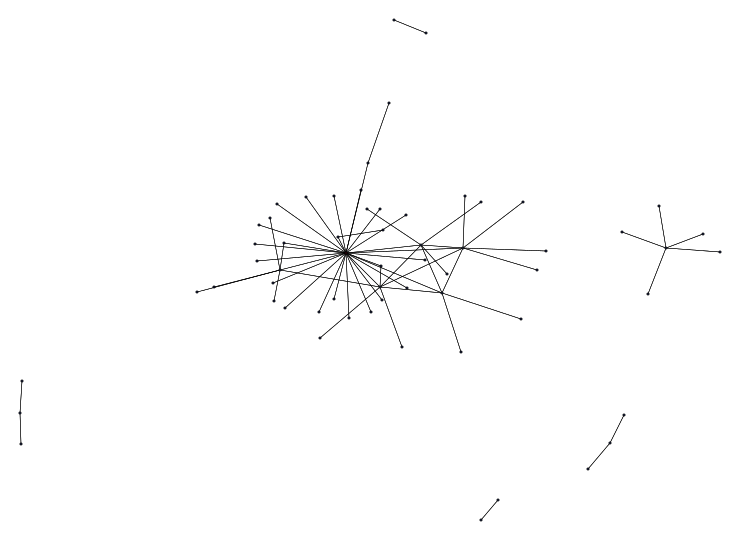

In [11]:
draw_graph(G_alice)

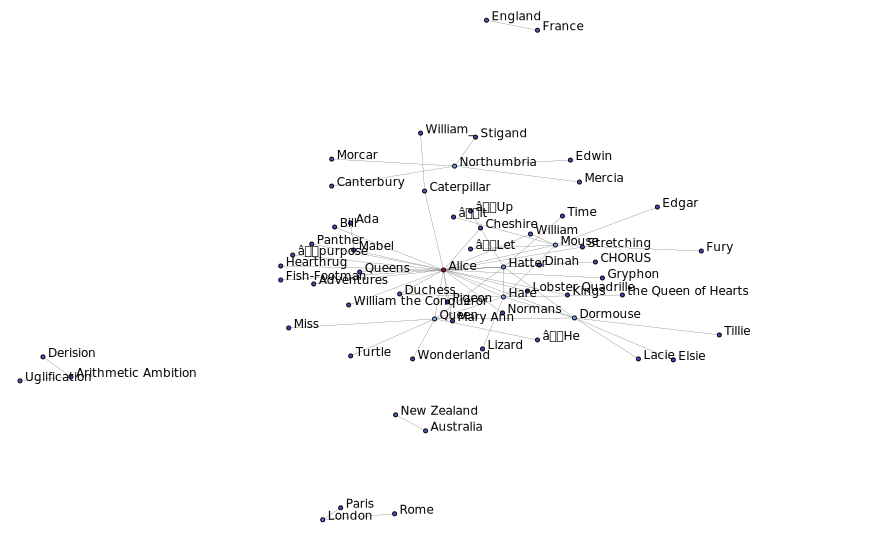

In [12]:
draw_graph(G_alice, edge_width=0.2, node_size=2, show_names=True, font_size=12)

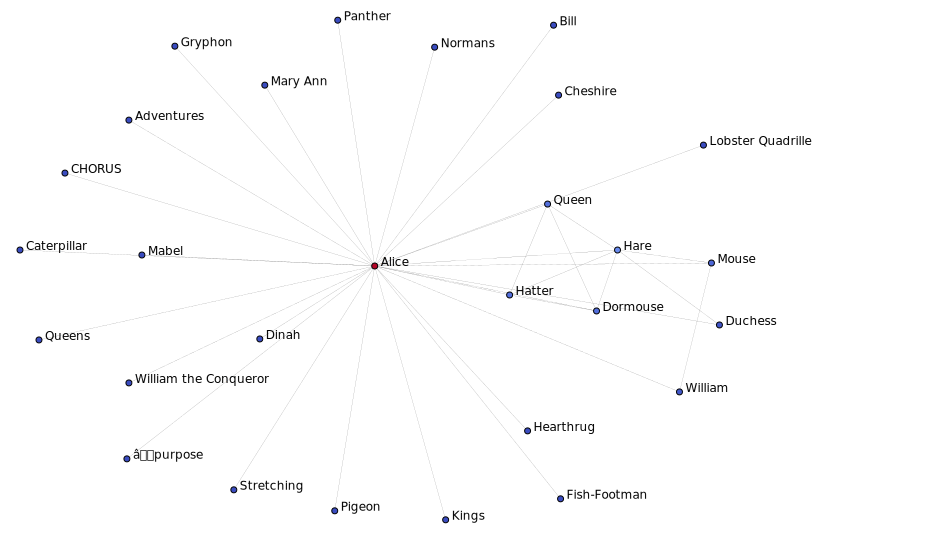

In [13]:
draw_ego_graph(G_alice, "Alice")

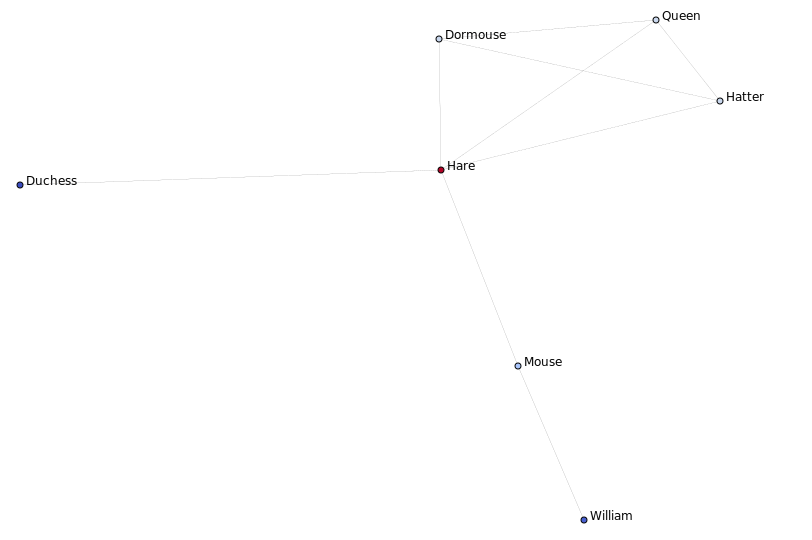

In [15]:
draw_ego_graph(G_alice, "Alice", center=False, k=1)